# Clasificación de Sentimientos (IMDB)

In [17]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

np.random.seed(2018)

import matplotlib.pyplot as plt

%matplotlib inline

### Cargamos el dataset

In [9]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

### Truncamos la entrada

In [10]:
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

### Creamos la arquitectura

In [12]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Entrenamos

In [20]:
history = model.fit(X_train, y_train, validation_split=0.33, epochs = 2, batch_size=256)

Train on 16750 samples, validate on 8250 samples
Epoch 1/2
16750/16750 [==============================] - 187s - loss: 0.2212 - acc: 0.9164 - val_loss: 0.2175 - val_acc: 0.9147
Epoch 2/2
16750/16750 [==============================] - 180s - loss: 0.1790 - acc: 0.9362 - val_loss: 0.2376 - val_acc: 0.9041


In [21]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 87.35%


### Loss Curves

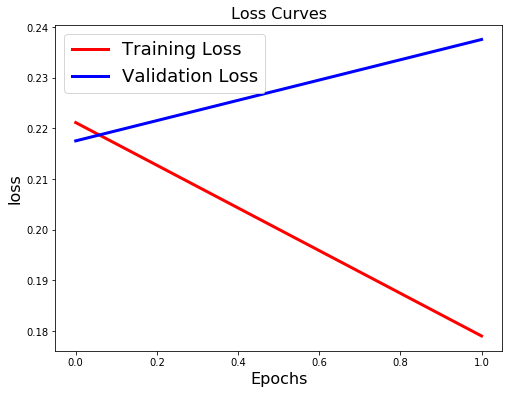

In [22]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], 'r', linewidth=3.0)
plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)
plt.show()

### Accuracy Curves

Text(0.5,1,'Accuracy Curves')

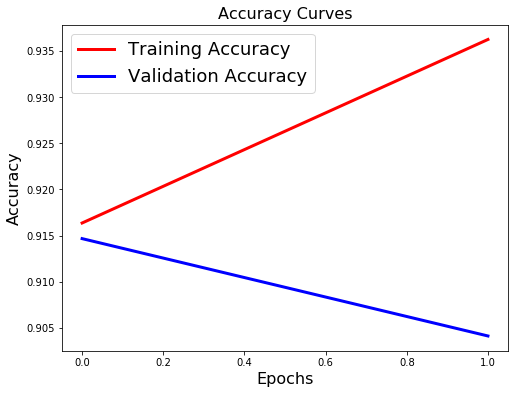

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['acc'], 'r', linewidth=3.0)
plt.plot(history.history['val_acc'], 'b', linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)